# <center>Exploratory Data Analysis 
    
<font size='3'>After reading the data with pandas, the following methods are used repeatedly.</font><br>
    
    df.head()                          to see few line of data
    df.describe()                      to see basic statistics of data
    df.info()                          to get basic information about data type of different class
    df.isnull().sum()                  to see if there are any missing values in any columns
    df.columns                         to see different columns in data in form of a list
    df[column_name].value_counts()     to see the total number of different item in the specified column
    df[column_name].unique             to see different item in column_name    
    pd.get_dummies(df[column_name])    to convert categorical class of column_name into a dummy vector 
    
    sorted(dict.items(),key=lambda x:x[1], reverse=True) to a sort dictionary (dict) by value in descending order
    sorted(dict.items(),key=lambda x:x[0], reverse=True) to a sort dictionary (dict) by key in descending order
    
    pd.concat([df1,df2],axis=1,join='inner')  To join two dataframe df1 and df2 columnwise.
    df.drop(['column_name'],axis=1,inplace=True) To drop the column_name from the dataframe df. 

# Step 1: Import the necessary modules <br>

<font size='3'>
    Before we start building a machine learning model or analyzing data, we first need to import the necessary libraries or modules. In this process, we can import <br>
    
    pandas, 
    numpy, 
    matplotlib, 
    seaborn 
       

In [184]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<font size='3'> In the next cell we load the data and in doing so two assumptions are made.:<br>
    
    1) Using read_csv assumes that the values in the data file are comma separated.
    2) The data file is in the same working directory because only the file name is specified here.
    
    After loading the data, two built-in methods '.shape' and '.head()' are used. The '.shape' specifies the shape (rows x columns) of the data as a tuple from which rows and columns are extracted. And the .head() method is used to display a few lines of data input.
    

# Step2:  Load data and explore   

In [461]:
df=pd.read_csv('Fish.csv')

print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in data.')
print(f'The first five rows of data looks as follows.')
df.head()

There are 159 rows and 7 columns in data.
The first five rows of data looks as follows.


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


<font size='3'>
    
The next step uses the built-in '.describe()' method to get the basic statistics of our data. There we see that the count represents the total number of rows, the mean is the sum of all actual values divided by the total number of values i.e $$\frac{\sum_i^n x_i}{n}$$<br>
    for example, for Weight column <br>$$mean = \frac{df.Weight.sum()}{len(df.Weight)}=398.326415$$. The std means the standard deviation, which is the deviation of each value from its mean, and the larger the standard deviation, the larger the spread of each value from the mean i.e $$std = \sqrt( \frac{\sum_i^n(x_i - mean )}{len(df.Weight)-1} )=357.9783165$$. Min and Max are the minimum and maximum values. The three numbers with the percent sign represent two quartiles.

</font>

In [3]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [644]:
#Here each quartiles are calculated manually. This values can be compared with the value in the above table.
# df['Weight'].quantile(0.5) 
quantile50 = df['Weight']
quantile50 = sorted(quantile50,reverse=False)
median     = quantile50[int( (len(quantile50))/2 )]

# df['Weight'].quantile(0.25) 
quantile25 = [item for item in quantile50 if item < median]
quantile25 = quantile25[int( len(quantile25)/2 )]

# df['Weight'].quantile(0.75) 
quantile75 = [item for item in quantile50 if item > median]
quantile75 = quantile75[int( len(quantile75)/2 )]

quantile25,median,quantile75

(120.0, 273.0, 650.0)

In [328]:
#Meaning of the columns of the data frame
information = {'Speceis':'Different type of fish',
 'Weight' :'Weight of fish in gram',
 'Length1':'Vertical length in cm',
 'Length2':'Diagonal length in cm',
 'Length3':'Cross length in cm',
 'Height' :'Height in cm',
 'Width':'Diagonal width in cm'}

information = pd.DataFrame({'Columns':information.keys(),'Explanation':information.values()})
information

,Columns,Explanation
0,Speceis,Different type of fish
1,Weight,Weight of fish in gram
2,Length1,Vertical length in cm
3,Length2,Diagonal length in cm
4,Length3,Cross length in cm
5,Height,Height in cm
6,Width,Diagonal width in cm


<font size='3'>
    
    The following Info method provides information about data. The information means what the data type is, are there null or missing values, etc. To see if there is a missing or null value, the built-in method .isnull() can be used and .sum() can also be applied to get the total number of missing values for each feature element (see the next code cell). The '.isnull()' method considers 'None','numpy.NaN','nan',empty string as null values.
</font>    

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [232]:
#Only df.isnull() returns True or False depending on whether a null value is present.
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

<font size='3'>
As we can see with df['Species'].unique(), there are 7 different species of fish. The following code counts the total of each fish and stores it in a dictionary with the fish name as the key and the total as the value. Later, this dictionary is sorted in descending order using the sorted method and lambda function. However, the same action can be performed with a single line of code using the built-in method value_counts() (see next code cell).
</font>    

In [264]:
#A dictionary is created with fish name as key and their total number as value. And this dictionary
#is converted into the pandas dataframe.
def count_each_item(input):    
    count = 0
    for item in df['Species']:
        if item == input:
            count += 1
    return count        

fish_number = {}
for item in df['Species'].unique():
    fish_number[item] = count_each_item(item)    
    
fish_number = dict(sorted(fish_number.items(),key=lambda x:x[1],reverse=True))
fish_number = pd.DataFrame({'Species':fish_number})
fish_number.T

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
Species,35,11,56,17,20,14,6


In [262]:
fish_number = df['Species'].value_counts()
fish_number = pd.DataFrame(fish_number)
fish_number.T

,Perch,Bream,Roach,Pike,Smelt,Parkki,Whitefish
Species,56,35,20,17,14,11,6


# Step3 : Data Visualization <br>

<font size='3'>
<p style='color:blue'>    </p>
In the following, a visualization technique is used to examine data. For this, matplotlib.pyplot is used and the pie chart and histogram are drawn for different items in the Species column. Later, a newly created fish_number table is plotted as a bar chart using seaborn's <b>barplot</b> method. In the <b>fish_number</b> data frame above, the names of the fish are shown as an index and their total number as a column. As a result they can be access as <b>fish_number.index</b> and <b>fish_number.Species</b>. And this is used in the next plot.
</font>    

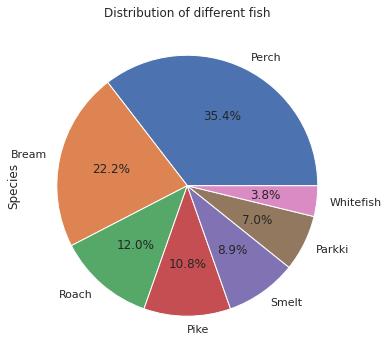

In [778]:
plt.title('Distribution of different fish')
df_new['Species'].value_counts().plot(kind='pie',autopct='%1.1f%%');

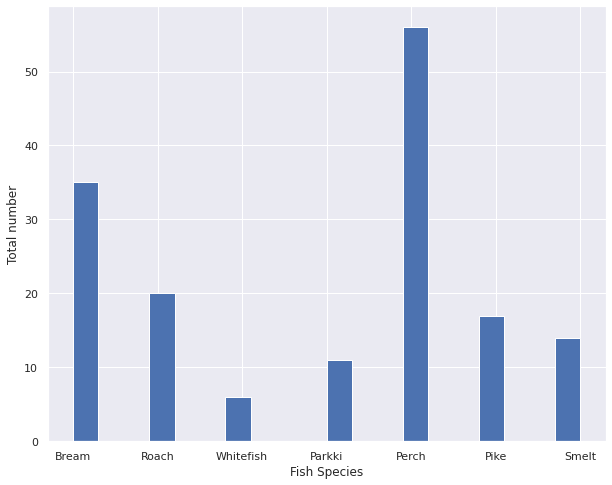

In [347]:
plt.figure(figsize=(10,8))
plt.xlabel('Fish Species')
plt.ylabel('Total number')
plt.hist(df['Species'],bins=20);

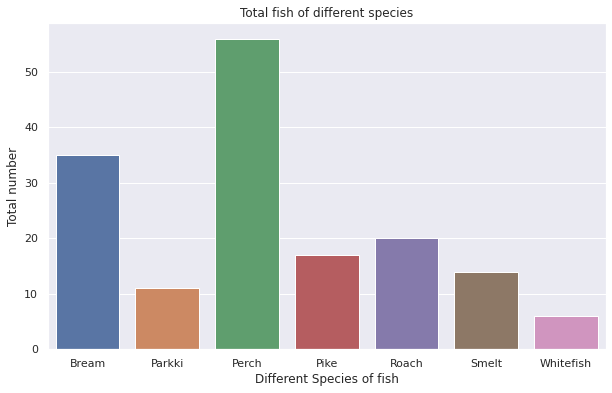

In [287]:
plt.rcParams["figure.figsize"] = (10,6)
plt.title('Total fish of different species')
plt.xlabel('Different Species of fish')
sns.barplot(x= fish_number.index, y = fish_number.Species);
plt.ylabel('Total number');  

<font size='3'>
Below I use a very powerful built-in <b>groupby</b> method to create the dataframe for each fish species. First I apply a group to the <b>Species</b> column and then use the <b>get_group</b> method to grab a unique element from <b>Species</b>. This allows me to create a dataframe for bream, parkki, perch, pike, roach, smelt and whitefish.
</font>    

In [313]:
dfg = df.groupby(['Species'])

df_Bream     = dfg.get_group('Bream')
df_Roach     = dfg.get_group('Roach')
df_Whitefish = dfg.get_group('Whitefish')
df_Parkki    = dfg.get_group('Parkki')
df_Perch     = dfg.get_group('Perch')
df_Pike      = dfg.get_group('Pike')
df_Smelt     = dfg.get_group('Smelt')

for item in df.Species.unique():
    print(f'The total data for {item} is {dfg.get_group(item).shape}.')

The total data for Bream is (35, 7).
The total data for Roach is (20, 7).
The total data for Whitefish is (6, 7).
The total data for Parkki is (11, 7).
The total data for Perch is (56, 7).
The total data for Pike is (17, 7).
The total data for Smelt is (14, 7).


<font size='3'>
    
Because different fish have different characteristics, we can perform the analysis separately for each data frame extracted for each fish. However, this data size is very small with a total of 159 rows and 7 columns. So we can consider different types of fish as just fish. Before we do that, we will first check if there are any outliers in our data, and if so, we will remove them.
</font>    

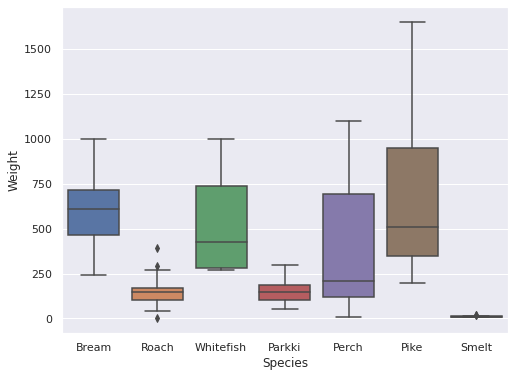

In [343]:
fig,ax = plt.subplots(figsize=(8,6))

sns.set_theme()
sns.set_style('darkgrid')
sns.boxplot(x='Species',y='Weight',data=df,palette='deep');

In [336]:
df[df['Weight']<=0]

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


<font size='3'>
From the above boxplot and the output of df[df['Weight']<=0], it has been found that the weight for the roach fish data contains some outliers. However, because the data set is small, only the "weight = 0" line is removed in this example while keeping others (This is of course not good practice and should not be done).
</font>                                                             

In [773]:
df_new = df.drop([40])
df_new.shape

(158, 7)

# Step 4: Concept of  Correlation and Correlation Matrix

## Importance of the Correlation Coefficient

<font size='3'>
The following text is copied word by word from the following website.<br>
    
https://vitalflux.com/correlation-heatmap-with-seaborn-pandas/ 
<br>
    
Correlation is used in linear regression models to determine the strength of the relationship between the dependent and independent variables. The linear regression model is a machine learning algorithm that is used to predict a continuous value, such as a price or quantity. The linear regression model uses the correlation between the dependent and independent variables to determine how much of the dependent variable is explained by the independent variable. In case there is a strongly positive or negative correlation, the predictor variables can be considered as features for training the models.
    
Correlation is often used in machine learning to identify multicollinearity, which is when two or more predictor variables are highly correlated with each other. Multicollinearity can impact the accuracy of predictive models, so it’s important to identify and remove predictors that are associated with high multicollinearity. There are different methods for identifying multicollinearity, but one common method is to calculate the variance inflation factor (VIF), which measures the degree of correlation between predictor variables. Variance inflation factor (VIF) is a measure of how much the variance of a parameter is increased by collinearity. VIFs are typically used in statistical modeling to assess multicollinearity and to help select model variables. In machine learning, VIF can be used to reduce the dimensionality of data by removing features that are highly correlated with each other. By reducing multicollinearity, VIF can improve the accuracy of predictions and prevent overfitting. Multicollinearity can be addressed either removing one of the correlated variables or by using regularization techniques. Regularization techniques penalize model complexity, which helps to prevent overfitting. In addition, feature engineering techniques can be used to create new features that are not strongly correlated with each other.    
    

In [489]:
df_new.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915719,0.918603,0.923090,0.723857,0.886654
Length1,0.915719,1.000000,0.999516,0.992004,0.624409,0.866684
Length2,0.918603,0.999516,1.000000,0.994083,0.639503,0.873201
Length3,0.923090,0.992004,0.994083,1.000000,0.702655,0.878189
Height,0.723857,0.624409,0.639503,0.702655,1.000000,0.792401
Width,0.886654,0.866684,0.873201,0.878189,0.792401,1.000000


The above numbers are calculated using the following formula of the <b>Pearson correlation coefficient (PCC) </b>. Let us suppose we have two different features X=[x1,x2...xn] and Y=[y1,y2..yn] and the PCC can be calculated as follows

corr_coeffiecient = $$\frac{\sum_i( (x_i - xmean)*(y_i-ymean) )}{\sqrt( \sum_i(x_i - xmean)^2*\sum_i(y_i - ymean)^2 ) }$$

The next code cell shows how to manually implement this formula.

In [490]:
Weight_mean  = df_new['Weight'].sum()/len(df_new['Weight'])
Length1_mean = df_new['Length1'].sum()/len(df_new['Length1']) 

numerator   = sum((df_new['Weight']-weight_mean)*(df_new['Length1']-Length1_mean))
denominator = np.sqrt( sum(( df_new['Weight']-weight_mean )**2)*sum(( df_new['Length1']-Length1_mean )**2) )
corr_coeff  = numerator/denominator
corr_coeff

0.915719476592731

<font size='3'>The above correlation table is presented in a figure below</font>

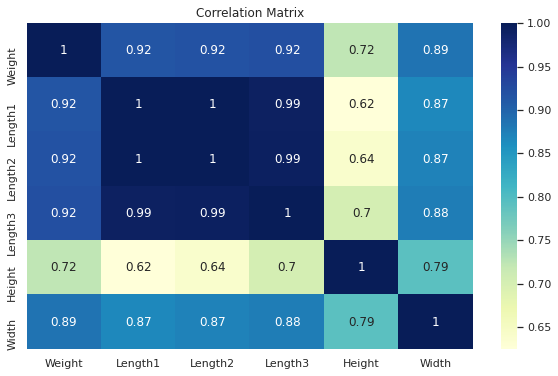

In [491]:
plt.rcParams['figure.figsize']=(10,6)
sns.heatmap(df_new.corr(),cmap="YlGnBu",annot=True)
plt.title('Correlation Matrix');

<font size='3'>
This correlation matrix shows that length1, length2 and length3 are strongly correlated with each other and also with other feature. In the following, these features are drop from data.
</font>    

In [492]:
column_drop = ['Length1','Length2','Length3']
df_new = df_new.drop(column_drop,axis=1)
df_new

,Species,Weight,Height,Width
0,Bream,242.0,11.5200,4.0200
1,Bream,290.0,12.4800,4.3056
2,Bream,340.0,12.3778,4.6961
3,Bream,363.0,12.7300,4.4555
4,Bream,430.0,12.4440,5.1340
...,...,...,...,...
154,Smelt,12.2,2.0904,1.3936
155,Smelt,13.4,2.4300,1.2690
156,Smelt,12.2,2.2770,1.2558
157,Smelt,19.7,2.8728,2.0672


# Step 5: Pairplot Visualization

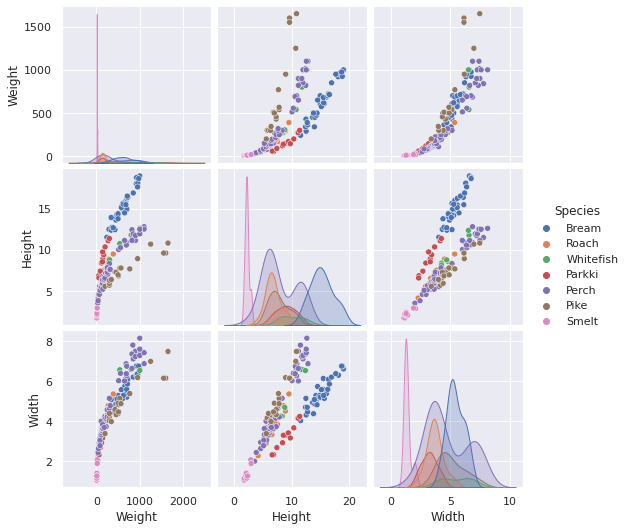

In [493]:
sns.pairplot(df_new,kind='scatter',hue='Species');
# sns.pairplot(df_new,kind='hist',hue='Species');

In [381]:
# plt.figure(figsize=(15,6))
# plt.subplot(1,2,1)
# plt.title('Fish Species versus Weight')
# plt.xlabel('Fish Species')
# plt.ylabel('Weight')
# plt.scatter(df['Species'],df['Weight'],marker='o');

# plt.subplot(1,2,2)
# plt.title('Fish Species versus Height')
# plt.xlabel('Fish Species')
# plt.ylabel('Height')
# plt.scatter(df['Species'],df['Height'],marker='o');

# Step6 : seaborn boxplot

In the following boxplot from seaborn library is used. The following are the few steps 
<br>

     'plt.subplots(figsize=(8,6))' set the canvas where the plot is displayed.
      sns.violinplot               makes plot shape like violin 
      sns.boxplot                  makes plot shape like box
      sns.despine

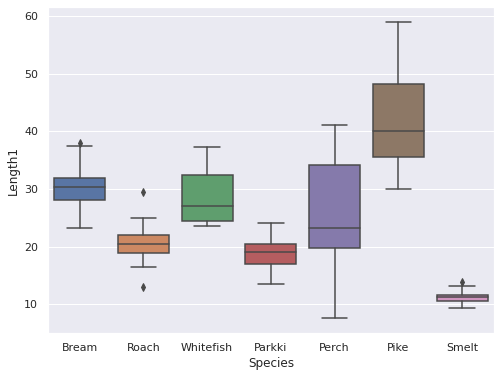

In [494]:
fish_list = ['Perch','Bream','Roach','Pike','Smelt','Parkki','Whitefish']

fig,ax = plt.subplots(figsize=(8,6))

sns.set_theme()
sns.set_style('darkgrid')
sns.boxplot(x='Species',y='Length1',data=df,palette='deep');

<font size='3'> Before understanding what was shown in the figure above, let's first understand what the boxplot is for. Boxplot is the representation of numeric data by its quartiles and it is important to visualize the outlier of the data, if any. This chart simply summarizes the 25th, 50th, and 75th percentiles. Proceed to the next step to understand what is shown in the image above. Let's look at a box at the left end. The first horizontal black line at the bottom is the minimum value and the another black line at the bottom of box shape is the First Quartile (Q1) or 25$\%$. The black horizontal line in the middle of the box shape is the Second Quartile (Q2) or 50$\%$ or mean. The third black horizontal line or the top of the box is the Third Quartile (Q3) or 75$\%$ and the next top horizontal line is the maximum value. As can be seen, there is a small diamond-shaped object on the top horizontal line, representing outliers or bad data. <br>

    The distance between Q1 and Q3 is called the interquartile range (IQR) (Q3-Q1) and is very important when calculating an outlier in data. A data point that is 1.5 times the IQR away from the center or Q2 is called an outlier. To check the outlier, the following two parameters need to be calculated
    
    1) Lower boundary  : Q1-1.5*IQR or Q1-1.5*(Q3-Q1)
    2) Upper boundary  : Q3+1.5*IQR or Q3+1.5*(Q3-Q1)
 
    To calculate the quartiles from scratch, the following steps should be taken:
    
    1) First, arrange the data in ascending order.
    2) Calculate the median of the data (a middle value). If the data has even entries, the average of the middle two numbers should be considered, otherwise the value at (n+1)/2 (n = number of items) should choose.
    3) When the median is calculated, the data is divided into two categories. Again, take the median of the data, which is below then the median or above then the median, that gives Q1 and Q3, respectively.
    
Similar to the medium, which divides the data in half, the quartile divides the data into quarters.
</font>    

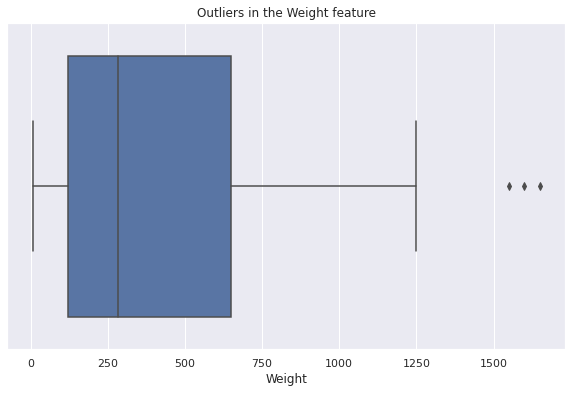

In [495]:
plt.title('Outliers in the Weight feature')
sns.boxplot(x=df_new['Weight']);
#We can see that there are three outliers represented by a diamond shaped object

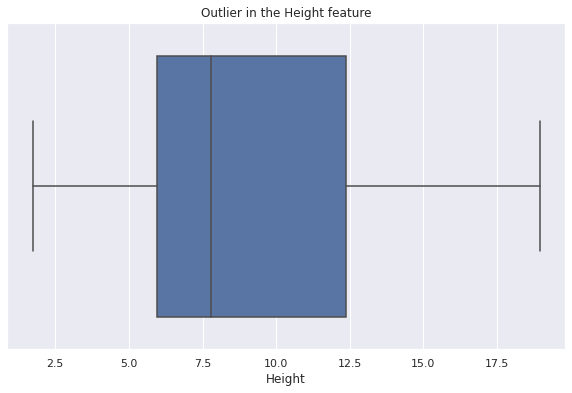

In [397]:
plt.title('Outlier in the Height feature')
sns.boxplot(x=df_new['Height']);

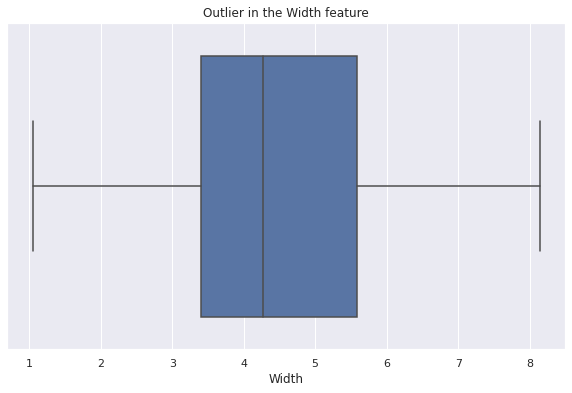

In [398]:
plt.title('Outlier in the Width feature')
sns.boxplot(x=df_new['Width']);

<font size='3'>
We can see in the boxplot above that there are three outliers in the weight function but no outliers in the height and width features. Below is an <b style='color:blue'>outlier detection function </b> that gives the actual value and location of the outlier.
</font>    
    

In [405]:
#Outlier detection function
def outlier_detector(inputData):
    Q1  = inputData.quantile(0.25)
    Q3  = inputData.quantile(0.75)
    IQR = Q3-Q1
    upper_boundary = Q3 + 1.5*IQR
    lower_boundary = Q1 - 1.5*IQR
    outlier = inputData[ (inputData < lower_boundary) | (inputData > upper_boundary)]
    return outlier    

In [496]:
#The position and values of the three outliers in the Weight feature are
outlier_detector(df_new['Weight'])

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

In [479]:
df_buf = df
data1 = df_new[df_new['Weight'] == 1600.0] 
data2 = df_new[df_new['Weight'] == 1550.0]
data3 = df_new[df_new['Weight'] == 1650.0]
pd.concat([data1,data2,data3],axis=0)

,Species,Weight,Height,Width
142,Pike,1600.0,9.600,6.144
143,Pike,1550.0,9.600,6.144
144,Pike,1650.0,10.812,7.480


<font size='3'>
There are no outliers in the height and width functions, so the above action is not necessary. In the next step these outliers are removed from the dataframe.
</font>    

In [497]:
#The above outliers are removed from the data frame as follows
df_new = df_new.drop([142,143,144],axis=0)
df_new.shape

(155, 4)

In [498]:
#At the end T implies transpose. This displays rows as column and columns as row
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,155.0,377.638065,319.144511,5.9000,120.00000,272.0000,615.00000,1250.000
Height,155.0,8.967102,4.333722,1.7284,5.92695,7.6800,12.37930,18.957
Width,155.0,4.382326,1.675564,1.0476,3.38565,4.2476,5.47275,8.142


# Step7 : Build Machine Learning Model

In [502]:
#First let's get feature matrix X and target variable Y
X = df_new[['Height','Width']]
y = df_new['Weight']
X.head()

,Height,Width
0,11.5200,4.0200
1,12.4800,4.3056
2,12.3778,4.6961
3,12.7300,4.4555
4,12.4440,5.1340


In [648]:
from sklearn.model_selection import train_test_split   #To split into train and test
from sklearn.preprocessing   import MinMaxScaler       #To normalize different scale data
from sklearn.preprocessing   import StandardScaler
from sklearn.preprocessing   import LabelEncoder
from sklearn.linear_model    import LinearRegression

In [503]:
#80% of data taken for training and 20% for test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)        

In [524]:
def shape_of_data(str,input_):    
        print(f'The shape of {str} is {input_.shape}')

shape_of_data('X_train',X_train)
shape_of_data('X_test',X_test)
shape_of_data('y_train',y_train)
shape_of_data('y_test',y_test)

The shape of X_train is (124, 2)
The shape of X_test is (31, 2)
The shape of y_train is (124,)
The shape of y_test is (31,)


# Step 8: Normalization of Data

When data is split, the height and width parameters are considered features. However, the height and the width are in different scales. If we train the model with data as is, then larger values of height compared to width will <b style='color:red'>dominate the learning process</b>. Therefore, we should normalize the data to be in the same range. This is accomplished using <b style='color:blue'>fit_transform</b> in the training data and just <b>transform</b> in test data. In the following, the model without scaling data is first examined and later the same process is repeated with scaled data to determine the meaning of the scaling data.

In [549]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [550]:
print(f'The coefficient of model is      {model.coef_}')
print(f'The intercept of linear model is {model.intercept_} ')
print(f'The model accuracy is            {model.score(X_test,y_test)}')

The coefficient of model is      [ 10.40686081 151.73209963]
The intercept of linear model is -386.1676143554406 
The model accuracy is            0.8960229976573091


In [603]:
#Here shows manually how model.predict calculates y_predict and compared with the outcome of model.predict
y_predict = model.coef_[0]*X_test['Height'] + model.coef_[1]*X_test['Width'] + model.intercept_

predicted_y = pd.DataFrame({'y_predicted1':y_predict,'y_predict2':model.predict(X_test)})
predicted_y.T

,82,146,31,29,119,61,94,151,157,69,...,12,9,24,70,132,96,46,87,85,127
y_predicted1,1517.176828,748.774556,2745.633312,2862.193439,2687.547623,1254.876795,1514.80853,790.628099,1017.952134,1745.033687,...,2070.845429,2241.163887,2487.744604,1898.987934,1845.369462,1628.729398,1495.668406,1507.297959,1541.605022,2835.954501
y_predict2,1517.176828,748.774556,2745.633312,2862.193439,2687.547623,1254.876795,1514.80853,790.628099,1017.952134,1745.033687,...,2070.845429,2241.163887,2487.744604,1898.987934,1845.369462,1628.729398,1495.668406,1507.297959,1541.605022,2835.954501


In [604]:
actual_weight     = pd.DataFrame(y_test,columns=['Weight'])
actual_weight     = actual_weight.reset_index(drop=True)
predicted_weight  = pd.DataFrame(model.predict(X_test),columns=['Predicted_Weight'])
model_comparison  = pd.concat([actual_weight,predicted_weight],axis=1)
model_comparison.head()

,Weight,Predicted_Weight
0,110.0,1517.176828
1,7.5,748.774556
2,955.0,2745.633312
3,1000.0,2862.193439
4,850.0,2687.547623


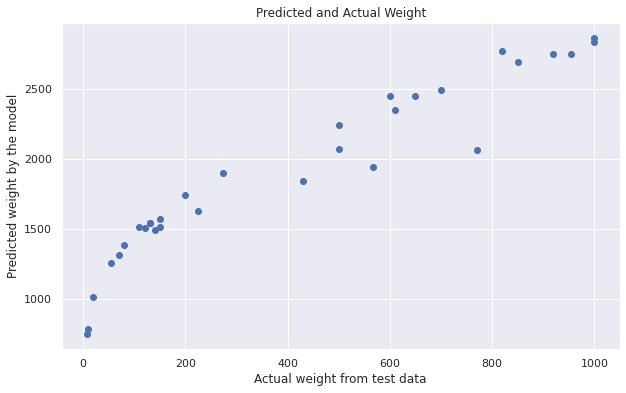

In [581]:
fig = plt.figure(figsize=(10,6))
plt.title('Predicted and Actual Weight')
plt.xlabel('Actual weight from test data')
plt.ylabel('Predicted weight by the model')
plt.scatter(y_test,model.predict(X_test));

<font size='3'>
The <b>StandardScaler()</b> is a class, so first the instance of class is created and then <b>fit_transform()</b> method is applied for train data and just <b>transform</b> for test data.   
</font>    

In [575]:
model_ss       = LinearRegression()
SS             = StandardScaler()
df_sklearn     = X_train.copy()
X_train_scaled = SS.fit_transform(df_sklearn)
X_test_scaled  = SS.transform(X_test)

In [576]:
model_ss.fit(X_train_scaled,y_train)

print(f'The coefficient of model is      {model_ss.coef_}')
print(f'The intercept of linear model is {model_ss.intercept_} ')
print(f'The model accuracy is            {model_ss.score(X_test_scaled,y_test)}')

The coefficient of model is      [ 43.03934424 253.97678128]
The intercept of linear model is 369.2879032258065 
The model accuracy is            0.8960229976573091


<font size='3'>
Even after scaled data, the model accuracy has not improved. The model parameters such as coefficients and intercept are changed, but the precision remains the same. Below, the predicted values from scaled and unscaled data are compared in a scatter plot. It shows that the predicted values for these two cases are almost exactly the same.
</font>    

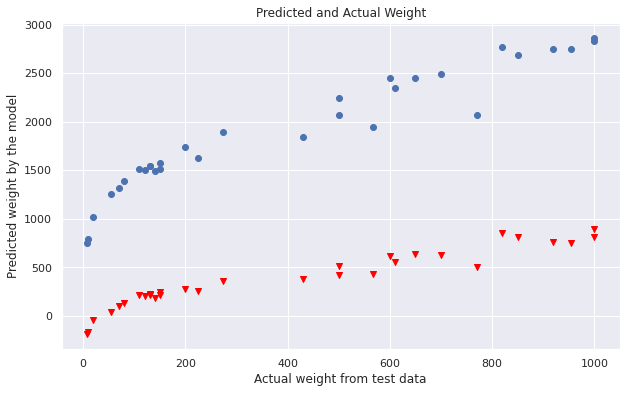

In [583]:
fig = plt.figure(figsize=(10,6))
plt.title('Predicted and Actual Weight')
plt.xlabel('Actual weight from test data')
plt.ylabel('Predicted weight by the model')
#with unscaled data
plt.scatter(y_test,model.predict(X_test));
#with scale data
plt.scatter(y_test,model_ss.predict(X_test_scaled),color='red',marker='v');

In [586]:
model.predict(X_test)

array([1517.17682779,  748.77455636, 2745.63331236, 2862.19343886,
       2687.54762347, 1254.87679459, 1514.80853009,  790.62809926,
       1017.95213363, 1745.03368681, 1572.64020453, 2065.20924319,
       1386.52901778, 1313.82511676, 2450.91973921, 2446.90817641,
       2747.23802721, 1541.73815848, 2771.40781324, 1941.51739841,
       2345.98797153, 2070.84542918, 2241.16388713, 2487.744604  ,
       1898.98793383, 1845.3694623 , 1628.72939751, 1495.66840578,
       1507.29795878, 1541.60502193, 2835.95450087])

# Conclusion

#### 1) We examined the data and explained each step as fully as possible
#### 2) The presence of missing values is checked and fortunately no such values are found
#### 3) Strongly correlated features are discarded to avoid multicollinearity
#### 4) Different data visualization techniques are used to get a better insight into the data
#### 6) To detect outliers, the help of boxplot is used and with the help of percentiles, outliers are removed from the data
#### 7) A linear model is designed with 80% train data and 20% data to test model accuracy
#### 8) How the model works and how the model predicts the value is displayed manually and compared to the result of model.predict

# Develop Machine learning model to predict fish type<br>


<font size='3'>
Above, we built a machine learning model to predict the weight of fish using information about the fish's width and height. However, below we use a different approach. In the following we try to predict the fish species with the information weight, height and width. To do this, categorical data is first converted into numerical data using <b>sklearn's LabelEncoder</b>.
</font>    


In [759]:
df2 = df_new

In [760]:
labels     = LabelEncoder()
fit_labels = labels.fit(df2['Species'])

In [761]:
fit_labels.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [749]:
numeric_class = fit_labels.transform(fit_labels.classes_)
numeric_class

array([0, 1, 2, 3, 4, 5, 6])

In [750]:
#Above classes can get as folows
fit_labels.inverse_transform(numeric_class)

array([0, 1, 2, 3, 4, 5, 6])

In [769]:
df2.T

,0,1,2,3,4,5,6,7,8,9,...,149,150,151,152,153,154,155,156,157,158
Species,Bream,Bream,Bream,Bream,Bream,Bream,Bream,Bream,Bream,Bream,...,Smelt,Smelt,Smelt,Smelt,Smelt,Smelt,Smelt,Smelt,Smelt,Smelt
Weight,242.0,290.0,340.0,363.0,430.0,450.0,500.0,390.0,450.0,500.0,...,9.8,8.7,10.0,9.9,9.8,12.2,13.4,12.2,19.7,19.9
Length1,23.2,24.0,23.9,26.3,26.5,26.8,26.8,27.6,27.6,28.5,...,10.7,10.8,11.3,11.3,11.4,11.5,11.7,12.1,13.2,13.8
Length2,25.4,26.3,26.5,29.0,29.0,29.7,29.7,30.0,30.0,30.7,...,11.2,11.3,11.8,11.8,12.0,12.2,12.4,13.0,14.3,15.0
Length3,30.0,31.2,31.1,33.5,34.0,34.7,34.5,35.0,35.1,36.2,...,12.4,12.6,13.1,13.1,13.2,13.4,13.5,13.8,15.2,16.2
Height,11.52,12.48,12.3778,12.73,12.444,13.6024,14.1795,12.67,14.0049,14.2266,...,2.0832,1.9782,2.2139,2.2139,2.2044,2.0904,2.43,2.277,2.8728,2.9322
Width,4.02,4.3056,4.6961,4.4555,5.134,4.9274,5.2785,4.69,4.8438,4.9594,...,1.2772,1.2852,1.2838,1.1659,1.1484,1.3936,1.269,1.2558,2.0672,1.8792


In [771]:
labels     = LabelEncoder()
df2['Species'] = labels.fit_transform(df2['Species']) 
df2

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,5,12.2,11.5,12.2,13.4,2.0904,1.3936
155,5,13.4,11.7,12.4,13.5,2.4300,1.2690
156,5,12.2,12.1,13.0,13.8,2.2770,1.2558
157,5,19.7,13.2,14.3,15.2,2.8728,2.0672


In [695]:
XX = df2.drop(['Species'],axis=1)
yy = df2['Species']

#### The table above clearly shows that the Pisces data is aggregated into some sort of block. Therefore, when splitting data, the data must be mixed, otherwise the model railroad will be made with one species of fish and predictions for other species of fish. This, of course, a negative effects model accuracy and reliability.

In [697]:
X_train,X_test,y_train,y_test = train_test_split(XX,yy,test_size=0.2,random_state=42,shuffle=True)    

In [714]:
model_new       = LinearRegression()
SS              = StandardScaler()
df_sklearn      = X_train.copy()
X_train_scaled = SS.fit_transform(df_sklearn)
X_test_scaled  = SS.transform(X_test)

In [715]:
model_new.fit(X_train_scaled,y_train)

LinearRegression()

In [716]:
print(f'The coefficient of linear of model is {model_new.coef_}')
print(f'The intercept   of linear of model is {model_new.intercept_}')
print(f'The accuracy    of model           is {model_new.score(X_test_scaled,y_test)}')

The coefficient of linear of model is [ 0.71615338 -1.85758866  0.17299931]
The intercept   of linear of model is 2.3387096774193545
The accuracy    of model           is 0.7648705103546733


In [726]:
y_predicted = model_new.predict(X_test_scaled)
y_real      = y_test

y_predicted = [int(x) for x in y_predicted]

pd.DataFrame({'yReal':y_real,'yPredicted':y_predicted}).T

,82,146,31,29,119,61,94,151,157,69,...,12,9,24,70,132,96,46,87,85,127
yReal,2,5,0,0,2,1,2,5,5,1,...,0,0,0,1,3,2,4,2,2,2
yPredicted,3,4,0,0,2,2,3,4,3,1,...,0,0,0,1,3,2,2,3,2,2


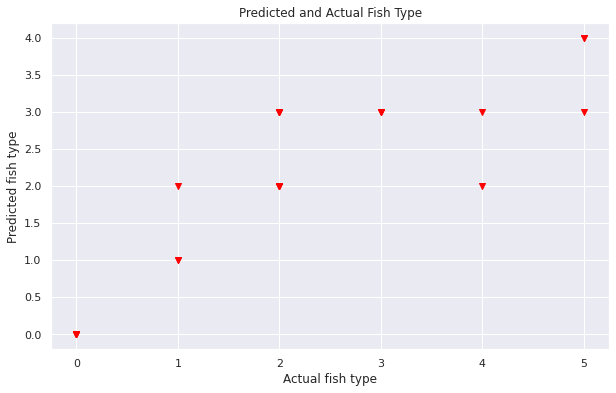

In [738]:
fig = plt.figure(figsize=(10,6))
plt.title('Predicted and Actual Fish Type')
plt.xlabel('Actual fish type')
plt.ylabel('Predicted fish type')
plt.scatter(y_real,y_predicted,marker='v',color='red');

##### The image above shows less data than the actual data size. This is because multiple (0,0) and other like this are plotted once <br>

<font color=crimson>
<b>The numerical nomenclature of fish is a bit difficult to understand. So let's transform categorical data back to its original form and create a pandas dataframe in the next code cell for aesthetic comparison.
</b>    
</font>    

In [768]:
pd.DataFrame({'Real':fit_labels.inverse_transform(y_real),\
              'Predicted':fit_labels.inverse_transform(y_predicted)})

,Real,Predicted
0,Perch,Pike
1,Smelt,Roach
2,Bream,Bream
3,Bream,Bream
4,Perch,Perch
5,Parkki,Perch
6,Perch,Pike
7,Smelt,Roach
8,Smelt,Pike
9,Parkki,Parkki


##### The model is only 76% accurate, which is not great. There are many reasons for this low accuracy, but the most notable is that we are applying a linear model to a not-so-linear dataset. There are other models that need to be checked. In the next section I will examine another model and explain it as clearly as possible.